In [1]:
import os.path
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import toolsets.raw_data_scaffold as rds
import toolsets.T_rex as trx
from pubchempy import Compound, get_compounds

from toolsets.search import quick_search_values, quick_search_sorted, string_search, search_feature, search_feature_msdial

In [2]:
from toolsets.file_io import readin_peak_list

In [3]:
df = readin_peak_list('/Volumes/scratch/Fanzhou/quick_check_pl/Winston0014_MX753152_posBA_Nala-Wallace-Week-6-078 - Copy.txt', alighment=False)

In [10]:
591.3162-591.3086

0.00760000000002492

In [2]:
master_dir = '/Users/fanzhoukong/Downloads'

# sample1

In [3]:
ms1, ms2 = rds.read_mzml('PoolQC011_MX753152_posBA_postWinston0100.mzml',master_dir)
mass_sorted, intensity_sorted, index_sorted, rt_list = trx.build_index(ms1)

# pmz = 591.3162
# rt = 89.98/60

In [7]:
94.41/60

1.5735

In [4]:
feature_temp = trx.get_features_beta(mass_sorted, intensity_sorted, index_sorted, rt_list)

100%|██████████| 66603/66603 [00:50<00:00, 1325.20it/s]


In [9]:
search_feature(feature_temp, 767.4538, mass_error=0.02)

,precursor_mz,eic_center,eic_offset,rt_apex,rt_start,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr
4884,767.442157,767.440861,0.01293,1.547998,1.505583,1.595417,1758.258911,17.0,"[324, 332, 342]",0.00449


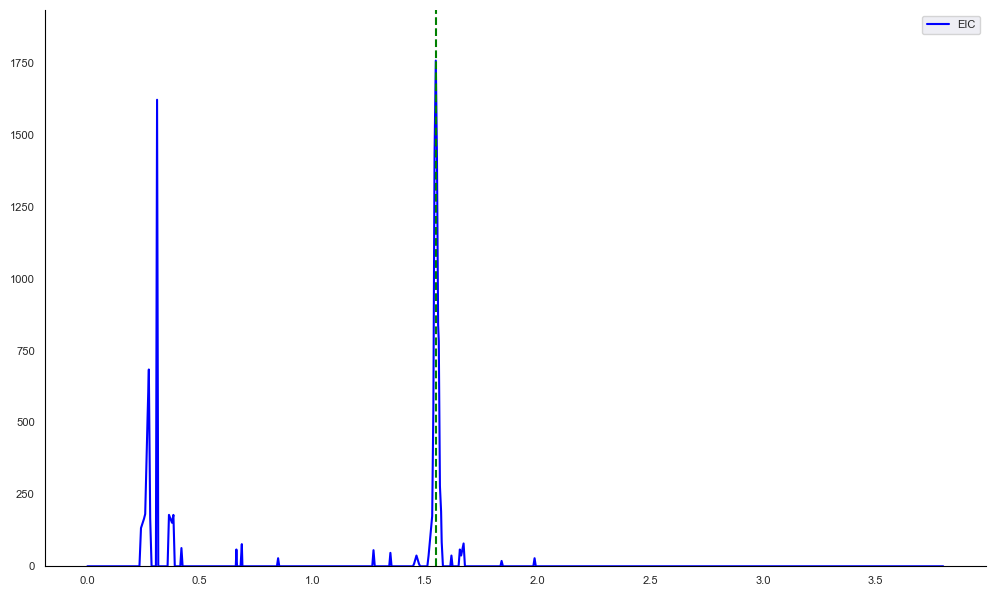

In [13]:
ion_trace = trx.flash_eic(767.442157, mass_sorted, intensity_sorted, index_sorted, mass_error=0.005)
rds.EIC(rt_list, intensity_list=ion_trace, vlines_location_2=[1.547998])

In [5]:
feature_temp

,precursor_mz,eic_center,eic_offset,rt_apex,rt_start,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr
0,663.442943,663.440771,0.009416,0.201992,0.024283,0.316667,4.932350e+06,83.0,"[9, 74, 93]",0.000084
1,664.446609,664.444377,0.009680,0.202470,0.011867,0.364150,2.020043e+06,96.0,"[4, 74, 101]",0.000064
2,236.143689,236.143096,0.006466,0.249457,0.208833,0.629733,1.500030e+06,73.0,"[75, 81, 149]",0.000000
3,236.144616,236.143096,0.006466,1.865349,1.822133,1.952883,2.258140e+03,23.0,"[389, 397, 413]",0.000902
4,180.117669,180.116857,0.005228,0.302463,0.269167,0.883950,1.274407e+06,117.0,"[85, 90, 203]",0.000008
...,...,...,...,...,...,...,...,...,...,...
5770,803.916458,803.911353,0.016343,0.227471,0.203500,0.306167,2.159239e+03,16.0,"[74, 78, 91]",0.000000
5771,732.595944,732.602588,0.012860,0.209000,0.175183,0.306167,6.211424e+03,22.0,"[68, 75, 91]",0.000000
5772,266.172865,266.176853,0.006880,2.412217,2.339850,2.547717,1.261665e+03,51.0,"[487, 502, 539]",0.001326
5773,1298.945263,1298.948810,0.022019,0.217205,0.177767,0.246833,2.369118e+03,11.0,"[69, 77, 81]",0.055562


In [20]:
export = search_feature(feature_temp, 591.3162, mass_error=0.01)
export.to_csv(os.path.join(master_dir, 'temp.csv'), index = False)

In [44]:
search_feature(ms2,591.3162, mass_error=0.01 )

,scan_idx,cycle,ms_level,precursor_mz,polarity,rt,peaks,isolation_window,ms1_pmz,ms1_rt,ms1_precursor_intensity,peak_purity,mz_offset,mix,base_name
338,637,298,2,591.309814,+,1.478917,"[[343.1609664818239, 559.2910766601562], [344....","(590.809814148541, 591.809814148541)",591.309418,1.475883,12531.243164,0.983149,0.000396,Winston0014_MX753152_posBA_Nala-Wallace-Week-6...,Winston0014_MX753152_posBA_Nala-Wallace-Week-6...
279,546,266,2,591.310087,+,1.293433,"[[122.05124333246586, 51.1604118347168], [136....","(590.810086707566, 591.810086707566)",591.310613,1.291900,959196.625000,1.000000,0.000527,Winston0014_MX753152_posBA_Nala-Wallace-Week-6...,Winston0014_MX753152_posBA_Nala-Wallace-Week-6...


In [48]:
591.3162-591.309814

0.006386000000020431

In [45]:
591.309814-591.308782

0.0010320000000092477

In [43]:
export

,precursor_mz,eic_center,eic_offset,rt_apex,rt_start,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr
22,591.307428,591.307346,0.007465,1.574532,1.544217,1.605367,2.827197e+03,10.0,"[309, 314, 320]",0.142333
18,591.308258,591.307346,0.007465,0.307145,0.238467,0.362283,8.817852e+04,19.0,"[81, 92, 101]",0.000660
19,591.308350,591.307346,0.007465,0.400811,0.362283,0.732933,2.111962e+04,61.0,"[101, 107, 163]",0.009979
20,591.308782,591.307346,0.007465,1.472186,1.418883,1.544217,1.296253e+04,20.0,"[288, 297, 309]",0.033828
5618,591.308782,591.316673,0.008495,1.472186,1.423883,1.590867,1.296253e+04,27.0,"[289, 297, 317]",0.000000
17,591.310666,591.307346,0.007465,1.285440,1.207567,1.418883,1.109038e+06,38.0,"[249, 265, 288]",0.000330
5617,591.310666,591.316673,0.008495,1.285440,1.222067,1.396717,1.109038e+06,31.0,"[252, 265, 284]",0.000231
21,591.311539,591.307346,0.007465,1.773091,1.605367,1.863850,3.083807e+03,39.0,"[320, 346, 360]",0.090041
5620,591.311539,591.316673,0.008495,1.773091,1.626550,1.827517,3.083807e+03,30.0,"[324, 346, 355]",0.000000
5619,591.319250,591.316673,0.008495,1.985798,1.911017,2.034500,4.421235e+03,19.0,"[367, 380, 387]",0.000000


In [31]:
591.3087-591.309814

-0.0011139999999159045

In [33]:
import toolsets.spectra_operations as so

In [34]:
msms =so.convert_nist_to_string(search_feature(ms2, 591.3087, mass_error=0.01).iloc[0]['peaks'])

In [35]:
import toolsets.spectra_plotter as plotter

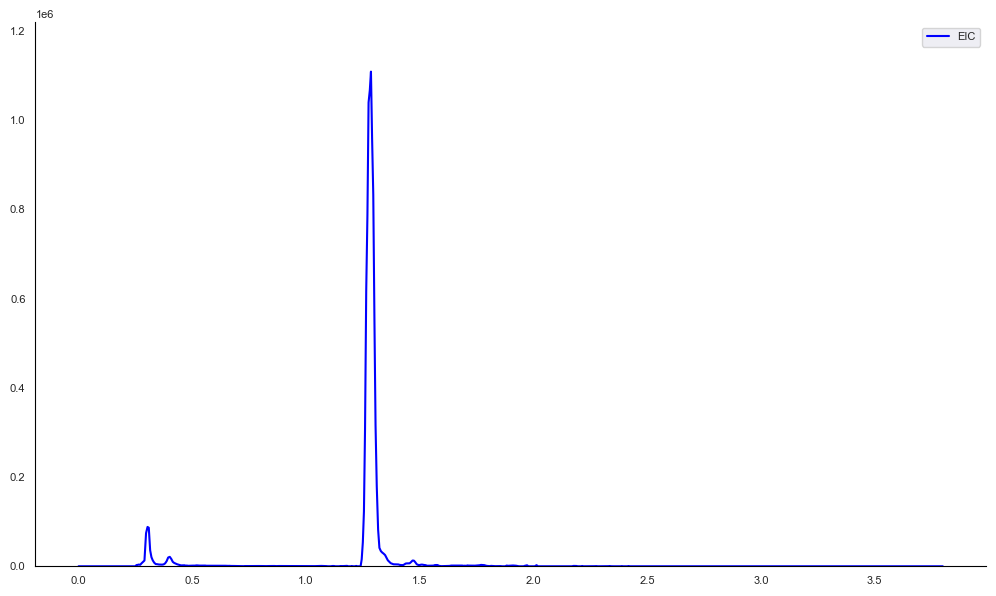

In [42]:
ion_trace = trx.flash_eic(591.3087, mass_sorted, intensity_sorted, index_sorted, mass_error=0.005)
rds.EIC(rt_list,ion_trace,
        # rt_start=1.2, rt_end=1.6
        savepath=os.path.join(master_dir, 'corrected_eic.png')
        )


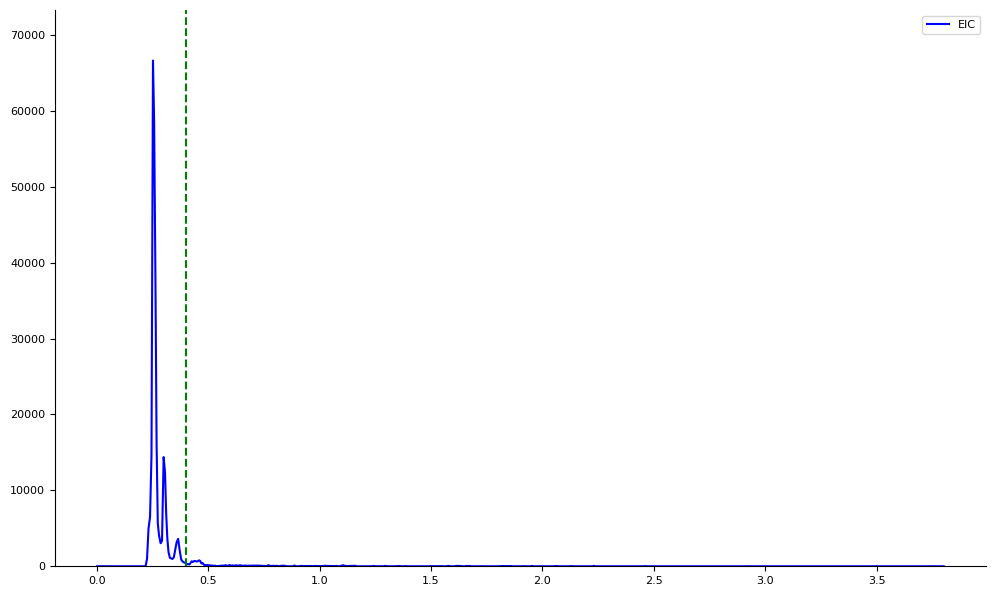

In [208]:
ion_trace = trx.flash_eic(271.048658, mass_sorted, intensity_sorted, index_sorted)
rds.EIC(rt_list,ion_trace, vlines_location_2=[0.4])

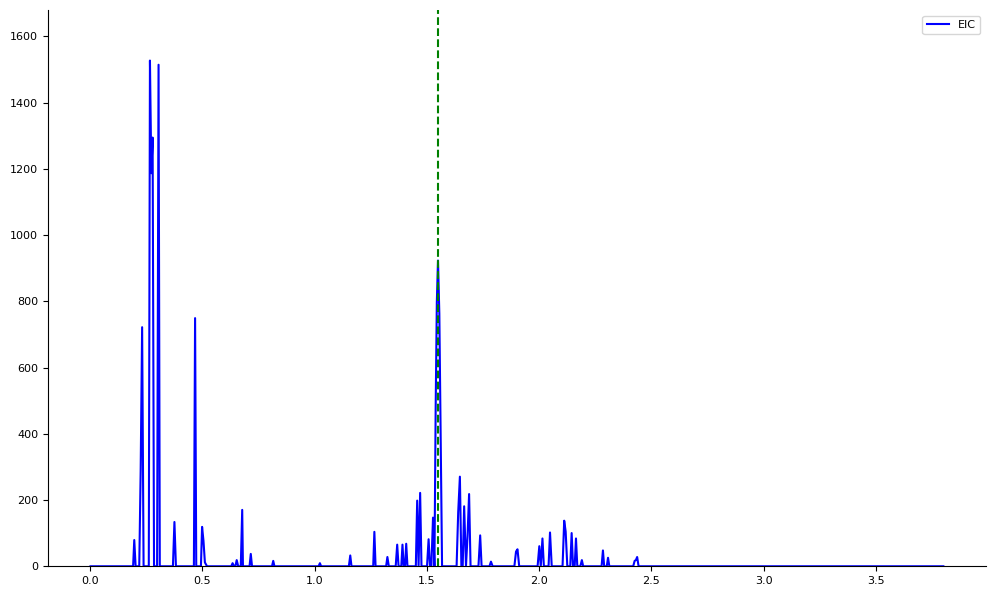

In [197]:
ion_trace = trx.flash_eic(767.442157, mass_sorted, intensity_sorted, index_sorted, gap_fill=False)
rds.EIC(rt_list, ion_trace,
        vlines_location_2=[1.547998]
        )

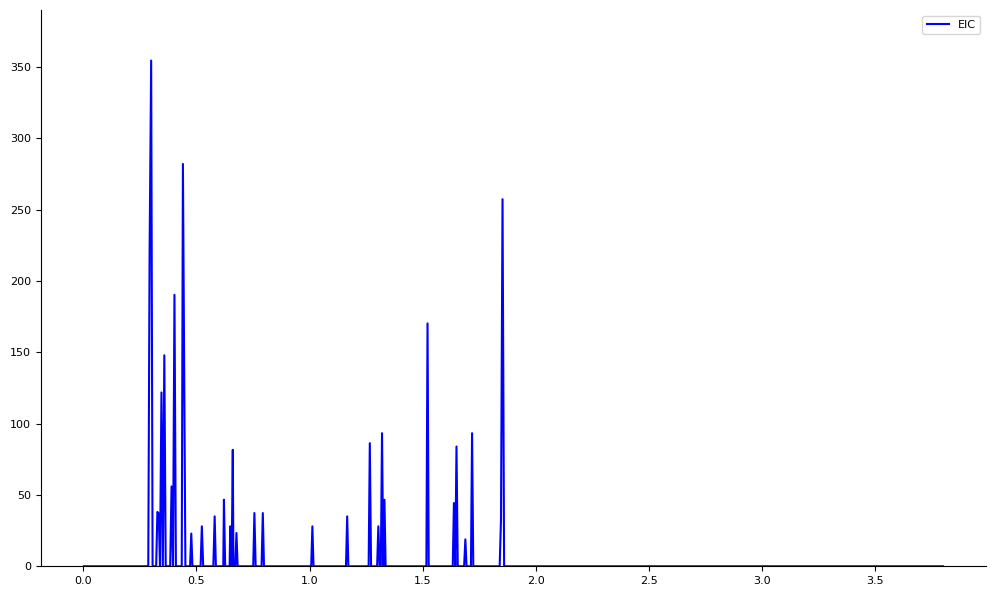

In [11]:
ion_trace = trx.flash_eic(767.4538, mass_sorted, intensity_sorted, index_sorted, gap_fill=False)
rds.EIC(rt_list, ion_trace)

# sample 2

In [159]:
ms1, ms2 = rds.read_mzml('Winston0014_MX753152_posBA_Nala-Wallace-Week-6-078.mzml',master_dir)
mass_sorted, intensity_sorted, index_sorted, rt_list = trx.build_index(ms1)
feature_temp = trx.get_features_beta(mass_sorted, intensity_sorted, index_sorted, rt_list)

100%|██████████| 83688/83688 [00:36<00:00, 2318.26it/s]


In [146]:
feature_temp = trx.get_features_beta(mass_sorted, intensity_sorted, index_sorted, rt_list)

100%|██████████| 83688/83688 [00:35<00:00, 2362.40it/s]


In [163]:
feature_temp['mz_offset']=np.abs(feature_temp['precursor_mz']-feature_temp['eic_center'])

In [173]:
feature_temp.sort_values(by  ='mz_offset', ascending=True, inplace=True)
feature_temp_deduplicate = pd.DataFrame(feature_temp.groupby(['precursor_mz', 'rt_apex']).first())

In [176]:
min_mz_offsets = feature_temp.groupby(['precursor_mz', 'rt_apex']).mz_offset.transform(min)
feature_temp_deduplicate = feature_temp.loc[feature_temp.mz_offset == min_mz_offsets]

In [181]:
search_feature(feature_temp, 591.3162)

,precursor_mz,eic_center,eic_offset,rt_apex,rt_start,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr,mz_offset
5620,591.311539,591.316673,0.008495,1.773091,1.626550,1.827517,3083.806885,30.0,"[324, 346, 355]",0.000000,0.005134
21,591.311539,591.307346,0.007465,1.773091,1.605367,1.863850,3083.806885,39.0,"[320, 346, 360]",0.090041,0.004194
5619,591.319250,591.316673,0.008495,1.985798,1.911017,2.034500,4421.234863,19.0,"[367, 380, 387]",0.000000,0.002576


In [186]:
search_feature(feature_temp_deduplicate, 591.3162, mass_error=0.01)

,precursor_mz,eic_center,eic_offset,rt_apex,rt_start,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr,mz_offset
22,591.307428,591.307346,0.007465,1.574532,1.544217,1.605367,2.827197e+03,10.0,"[309, 314, 320]",0.142333,0.000082
18,591.308258,591.307346,0.007465,0.307145,0.238467,0.362283,8.817852e+04,19.0,"[81, 92, 101]",0.000660,0.000912
19,591.308350,591.307346,0.007465,0.400811,0.362283,0.732933,2.111962e+04,61.0,"[101, 107, 163]",0.009979,0.001005
20,591.308782,591.307346,0.007465,1.472186,1.418883,1.544217,1.296253e+04,20.0,"[288, 297, 309]",0.033828,0.001436
17,591.310666,591.307346,0.007465,1.285440,1.207567,1.418883,1.109038e+06,38.0,"[249, 265, 288]",0.000330,0.003321
21,591.311539,591.307346,0.007465,1.773091,1.605367,1.863850,3.083807e+03,39.0,"[320, 346, 360]",0.090041,0.004194
5619,591.319250,591.316673,0.008495,1.985798,1.911017,2.034500,4.421235e+03,19.0,"[367, 380, 387]",0.000000,0.002576


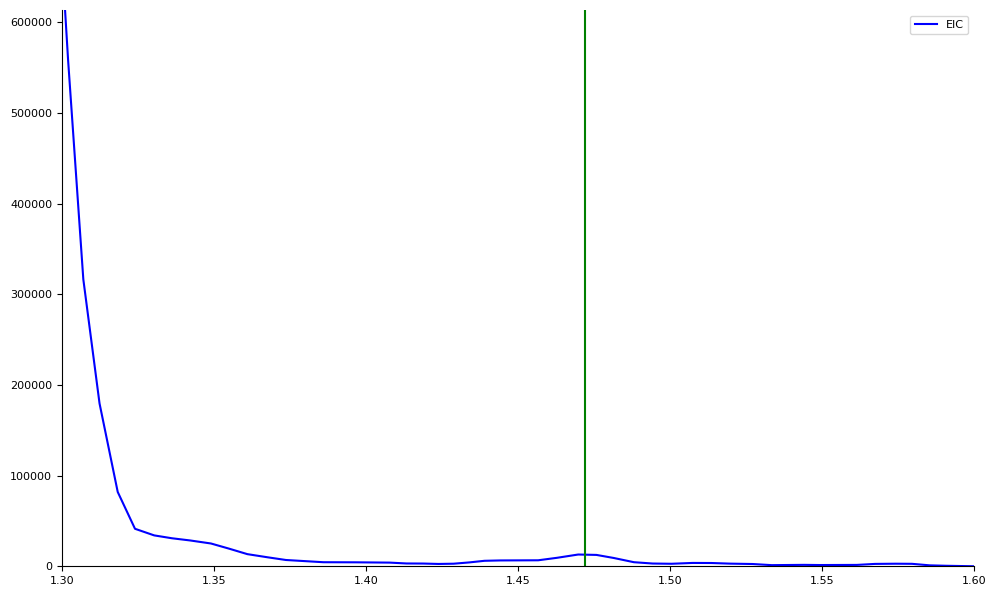

In [195]:
ion_trace = trx.flash_eic(591.307346, mass_sorted, intensity_sorted, index_sorted,gap_fill=False)
rds.EIC(rt_list, ion_trace, vlines_location_2=[1.472186],
        rt_start=1.3, rt_end=1.6
        )

In [2]:
master_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/polyphenols'
df = pd.read_csv(os.path.join(master_dir,  'polyphenols-libgen-input.csv'))

In [3]:
from rdkit import Chem
from toolsets.std_list_prep import check_mol

In [8]:
smiles = []
inchikey = []
for index, row in tqdm(df.iterrows(), total= len(df)):
    if row['SMILES']!= row['SMILES'] or check_mol(row['SMILES']) is np.NAN:
    # break
        cc = get_compounds(row['Common name'], 'name')
        if len(cc)>0:
            smiles.append(cc[0].isomeric_smiles)
            inchikey.append(cc[0].inchikey)
        else:
            smiles.append(np.NAN)
            inchikey.append(np.NAN)
    else:
        smiles.append(row['SMILES'])
        mol = Chem.MolFromSmiles(row['SMILES'])
        inchikey.append(Chem.MolToInchiKey(mol))
    # break


100%|██████████| 640/640 [00:04<00:00, 158.97it/s]


In [9]:
df['smiles_fetched']=smiles
df['inchikey_feched']=inchikey

In [11]:
df_fetched = df[['Common name', 'smiles_fetched','RT (-) TTOF','Mix filename (pos)','Mix filename (neg)', 'inchikey_feched']]

In [12]:
from toolsets.std_list_prep import neutrilize_salt_df, neutrilize_salt, std_list_cleanup

In [92]:
df_cleaned =neutrilize_salt_df(df_fetched)

In [75]:
from molmass import Formula

In [93]:
labels = []
for index, row in df_cleaned.iterrows():
    if Formula(row['original_formula']).formula !=Formula(row['uncharged_formula']).formula:
        labels.append('check')
    else:
        labels.append('pass')
df_cleaned['labels']=labels

In [103]:
df_cleaned['mix_pos']=

,common name,smiles_fetched,rt (-) ttof,mix filename (pos),mix filename (neg),inchikey_feched,original_smiles,original_formula,original_formal_charges,stripped_smiles,stripped_formula,stripped_formal_charges,uncharged_smiles,uncharged_formula,uncharged_formal_charges,monoisotopic_mass,labels
4,Meclocycline sulfosalicylate salt,OC(=O)c1cc(ccc1O)S(O)(=O)=O.[H][C@@]12[C@@H](O...,NaN,Polyphenols-pos-mix1,Polyphenols-neg-mix1,FYSVKUUNXYGFLA-CCHMMTNSSA-N,C=C1c2c(Cl)ccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(...,C29H27ClN2O14S,0,C=C1c2c(Cl)ccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(...,C22H21ClN2O8,0,C=C1c2c(Cl)ccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(...,C22H21ClN2O8,0,476.098643,check
9,DL-Adrenaline Hydrochloride,Cl.CNCC(O)c1ccc(O)c(O)c1,0.312,Polyphenols-pos-mix2,Polyphenols-neg-mix2,ATADHKWKHYVBTJ-UHFFFAOYSA-N,CNCC(O)c1ccc(O)c(O)c1.Cl,C9H14ClNO3,0,CNCC(O)c1ccc(O)c(O)c1,C9H13NO3,0,CNCC(O)c1ccc(O)c(O)c1,C9H13NO3,0,183.089543,check
13,Doxorubicin hydrochloride,Cl.COc1cccc2C(=O)c3c(O)c4C[C@](O)(C[C@H](O[C@H...,2.917,Polyphenols-pos-mix2,Polyphenols-neg-mix2,MWWSFMDVAYGXBV-RUELKSSGSA-N,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,C27H30ClNO11,0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,C27H29NO11,0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,C27H29NO11,0,543.174061,check
25,Vancomycin hydrochloride,Cl.CN[C@H](CC(C)C)C(=O)N[C@@H]1[C@H](O)c2ccc(O...,NaN,Polyphenols-pos-mix3,Polyphenols-neg-mix3,LCTORFDMHNKUSG-XTTLPDOESA-N,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,C66H76Cl3N9O24,0,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,C66H75Cl2N9O24,0,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,C66H75Cl2N9O24,0,1447.430200,check
34,Doxycycline (hyclate),O.Cl.Cl.CCO.C[C@@H]1[C@H]2[C@H](O)[C@H]3[C@H](...,NaN,Polyphenols-pos-mix4,Polyphenols-neg-mix4,UHHHTIKWXBRCLT-VDBOFHIQSA-N,CCO.C[C@H]1c2cccc(O)c2C(O)=C2C(=O)[C@]3(O)C(O)...,C46H58Cl2N4O18,0,CCO.C[C@H]1c2cccc(O)c2C(O)=C2C(=O)[C@]3(O)C(O)...,C46H54N4O17,0,CCO.C[C@H]1c2cccc(O)c2C(O)=C2C(=O)[C@]3(O)C(O)...,C46H54N4O17,0,934.348396,check
50,Danshensu sodium salt,[Na+].OC(Cc1ccc(O)c(O)c1)C([O-])=O,1.187,Polyphenols-pos-mix6,Polyphenols-neg-mix6,ZMMKVDBZTXUHFO-UHFFFAOYSA-M,O=C([O-])C(O)Cc1ccc(O)c(O)c1.[Na+],C9H9NaO5,0,O=C(O)C(O)Cc1ccc(O)c(O)c1,C9H10O5,0,O=C(O)C(O)Cc1ccc(O)c(O)c1,C9H10O5,0,198.052823,check
54,(+)-Catechin Hydrate,O.O[C@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1ccc(O)c(O)c1,NaN,Polyphenols-pos-mix6,Polyphenols-neg-mix6,OFUMQWOJBVNKLR-NQQJLSKUSA-N,O.Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@@H](...,C15H16O7,0,Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@@H](O)C2,C15H14O6,0,Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@@H](O)C2,C15H14O6,0,290.079038,check
90,Daunorubicin hydrochloride,Cl.COc1cccc2C(=O)c3c(O)c4C[C@](O)(C[C@H](O[C@H...,NaN,Polyphenols-pos-mix10,Polyphenols-neg-mix10,GUGHGUXZJWAIAS-QQYBVWGSSA-N,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,C27H30ClNO10,0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,C27H29NO10,0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,C27H29NO10,0,527.179146,check
94,Higenamine hydrochloride,Cl.Oc1ccc(CC2NCCc3cc(O)c(O)cc23)cc1,1.606,Polyphenols-pos-mix10,Polyphenols-neg-mix10,SWWQQSDRUYSMAR-UHFFFAOYSA-N,Cl.Oc1ccc(CC2NCCc3cc(O)c(O)cc32)cc1,C16H18ClNO3,0,Oc1ccc(CC2NCCc3cc(O)c(O)cc32)cc1,C16H17NO3,0,Oc1ccc(CC2NCCc3cc(O)c(O)cc32)cc1,C16H17NO3,0,271.120843,check
114,Quercetin Dihydrate,O.O.Oc1cc(O)c2c(c1)oc(-c1ccc(O)c(O)c1)c(O)c2=O,NaN,Polyphenols-pos-mix12,Polyphenols-neg-mix12,GMGIWEZSKCNYSW-UHFFFAOYSA-N,O.O.O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,C15H14O9,0,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,C15H10O7,0,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,C15H10O7,0,302.042653,check


In [70]:
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.molSize = (800, 800)

In [79]:
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
from rdkit.Chem.Descriptors import ExactMolWt

In [105]:
std_list_pos = { 'name': df_cleaned['common name'],
             # 'abb':std_list_nt['abbreviated'],
             # 'inchikey': std_list_nt['uncharged_inchikey'],
             'mix':df_cleaned['mix filename (pos)'],
            'rt_reference':df_cleaned['rt (-) ttof'],
             'smiles':df_cleaned['uncharged_smiles'],
             'formula':df_cleaned['uncharged_formula'],
             # 'mono_mass':df_cleaned['monoisotopic_mass'],
             'formal_charges':df_cleaned['uncharged_formal_charges'],
            'label':df_cleaned['labels']
             # 'rt_plus':std_list_nt['rt_plus'],
             # 'rt_minus':std_list_nt['rt_minus']
             }
std_list_pos = pd.DataFrame(std_list_pos)
std_list_neg = { 'name': df_cleaned['common name'],
                 # 'abb':std_list_nt['abbreviated'],
                 # 'inchikey': std_list_nt['uncharged_inchikey'],
                 'mix':df_cleaned['mix filename (neg)'],
                 'rt_reference':df_cleaned['rt (-) ttof'],
                 'smiles':df_cleaned['uncharged_smiles'],
                 'formula':df_cleaned['uncharged_formula'],
                 # 'mono_mass':df_cleaned['monoisotopic_mass'],
                 'formal_charges':df_cleaned['uncharged_formal_charges'],
                 'label':df_cleaned['labels'],
                 # 'rt_plus':std_list_nt['rt_plus'],
                 # 'rt_minus':std_list_nt['rt_minus']
                 }
std_list_neg = pd.DataFrame(std_list_neg)

In [106]:
std_list_pos

,name,mix,rt_reference,smiles,formula,formal_charges,label
0,Theaflavin-3-gallate,Polyphenols-pos-mix1,2.958,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(=O...,C36H28O16,0,pass
1,Daurisoline,Polyphenols-pos-mix1,2.311,COc1cc2c(cc1O)[C@@H](Cc1ccc(O)c(Oc3ccc(C[C@@H]...,C37H42N2O6,0,pass
2,Ellagic acid,Polyphenols-pos-mix1,2.227,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,C14H6O8,0,pass
3,Methyl-Hesperidin,Polyphenols-pos-mix1,2.882,COc1ccc([C@@H]2CC(=O)c3c(O)cc(O[C@@H]4O[C@H](C...,C29H36O15,0,pass
4,Meclocycline sulfosalicylate salt,Polyphenols-pos-mix1,NaN,C=C1c2c(Cl)ccc(O)c2C(=O)C2=C(O)[C@]3(O)C(=O)C(...,C22H21ClN2O8,0,check
...,...,...,...,...,...,...,...
635,Apigenin,Polyphenols-pos-mix66,3.266,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,C15H10O5,0,pass
636,Laetanine,Polyphenols-pos-mix66,1.959,COc1cc2c(cc1O)-c1c(OC)c(O)cc3c1[C@H](C2)NCC3,C18H19NO4,0,pass
637,Apigenin-7-O-(2G-rhamnosyl)gentiobioside,Polyphenols-pos-mix66,2.285,CC1OC(OC2C(Oc3cc(O)c4c(=O)cc(-c5ccc(O)cc5)oc4c...,C33H40O19,0,pass
638,Cirsimaritin,Polyphenols-pos-mix66,3.772,COc1cc2oc(-c3ccc(O)cc3)cc(=O)c2c(O)c1OC,C17H14O6,0,pass


In [113]:
std_list_pos.to_csv(os.path.join(master_dir, 'std_list_pos.csv'), index = False)
std_list_neg.to_csv(os.path.join(master_dir, 'std_list_neg.csv'), index = False)